# **Chapter 9**
## *Exploratory Data Analysis and Diagnosis*,

This chapter dives into visualization techniques for effective Exploratory Data Analysis (EDA) with interactive visualizations. You will learn how to investigate and diagnose your time series data to test for specific assumptions such as stationarity and autocorrelation. Finally, the chapter covers practical recipes for transforming your time series data using a family of power transforms, decomposition, and differencing methods.

Additionally, how decompose a time series into its components (trend, seasonality, and residuals), test for different assumptions that your models may rely on (such as stationarity, normality, and homoskedasticity), and explore techniques to transform the data to satisfy some of these assumptions.  

The recipes that you will encounter in this chapter are as follows:  
* Plotting time series data using pandas
* Plotting time series data with interactive visualizations using hvPlot
* Decomposing time series data
* Detecting time series stationarity
* Applying power transformations
* Testing for autocorrelation in time series data

# Technical Requirements for the Chapter

In this chapter and onward, we will extensively use pandas 1.4.2 (released April 2, 2022). This applies to all the recipes in the chapter.

There are four additional libraries that we will be using:
• hvplot and PyViz
• seaborn
• matplotlib


* If you are using `pip`, then you can install these packages from your terminal with the following:

```
pip install hvplot seaborn matplotlib jupyter plotly==5.5.0
```

If you are using `conda`, then you can install these packages with the following:

```
conda install -c conda-forge seaborn
conda install -c plotly plotly=5.5.0
conda install -c pyviz hvplot
```

The visualizations should work in Jupyter notebooks, but if you plan to use JupyterLab, then you will need to install an additional extension, jupyterlab_pyviz:

```
conda install jupyterlab
jupyter labextension install @pyviz/jupyterlab_pyviz
```

Throughout this chapter, you will be using three datasets (Closing Price Stock Data, CO2, and Air Passengers). The CO2 and Air Passengers datasets are provided with the statsmodels library. The Air Passengers dataset contains monthly airline passenger numbers from 1949 to 1960. The CO2 dataset contains weekly atmospheric carbon dioxide levels on Mauna Loa. The Closing Price Stock Data dataset includes Microsoft, Apple, and IBM stock prices from November 2019 to November 2021.

In [ ]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.datasets import co2, get_rdataset

file = Path('/content/drive/MyDrive/Lectura Técnica/Time-Series-Analysis-with-Python-Cookbook/datasets/Ch9/closing_price.csv')
closing_price = pd.read_csv(file,
                            index_col='Date',
                            parse_dates=True)
co2_df = co2.load_pandas().data
co2_df = co2_df.ffill()
air_passengers = get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='M')
airp_df.drop(columns=['time'], inplace=True)
# store for future use
airp_df.reset_index().rename(columns={'value':'passengers', 'index':'date'}).to_csv('/content/drive/MyDrive/Lectura Técnica/Time-Series-Analysis-with-Python-Cookbook/datasets/Ch9/air_passenger.csv', index=False)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
# plt.rc('font', size=8)                     ##
# plt.rc('axes', titlesize=16)               ##
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ##
#############################################

# Recipe 1. Plotting Time Series Data using pandas

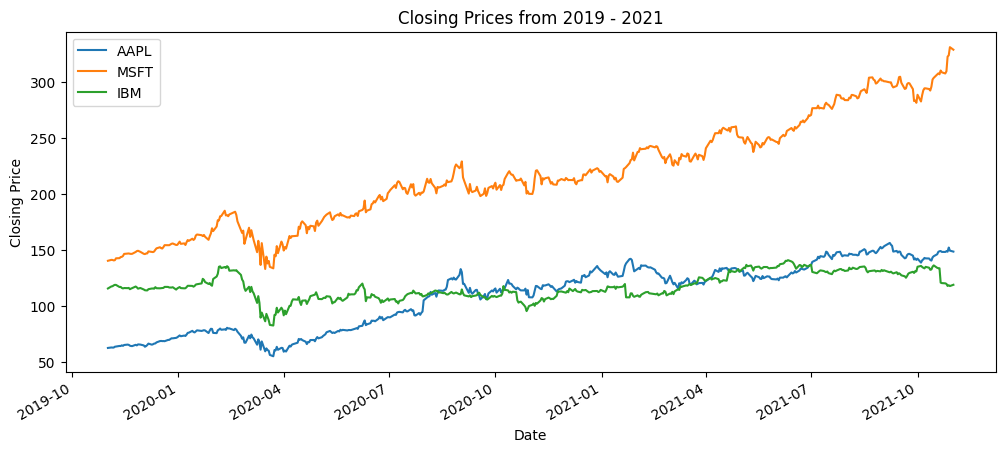

In [ ]:
start_date = '2019'
end_date = '2021'
plot = closing_price.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Closing Price')
# plt.savefig('images/fig_9.1.png', bbox_inches='tight')

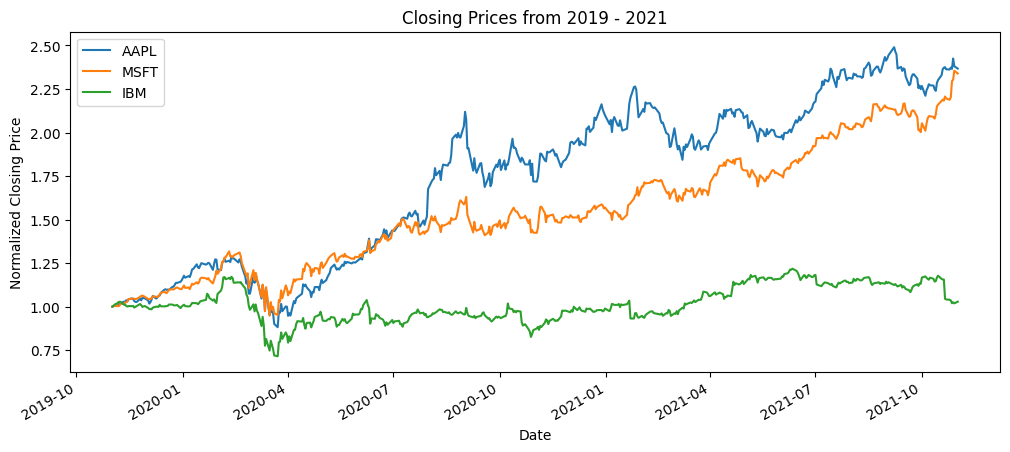

In [ ]:
# normalizar la data
closing_price_n = closing_price.div(closing_price.iloc[0])
plot = closing_price_n.plot(
    title = f"Closing Prices from {start_date} - {end_date}",
    ylabel = "Normalized Closing Price"
)
#plt.savefig('images/fig_9.2.png', bbox_inches='tight')

In [ ]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


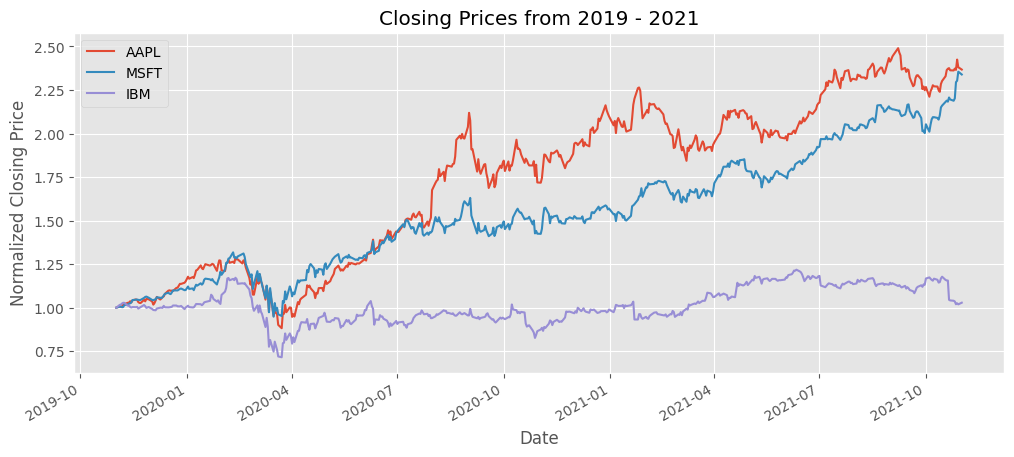

In [ ]:
plt.style.use('ggplot')
plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price')
#plt.savefig('images/fig_9.4.png', bbox_inches='tight')

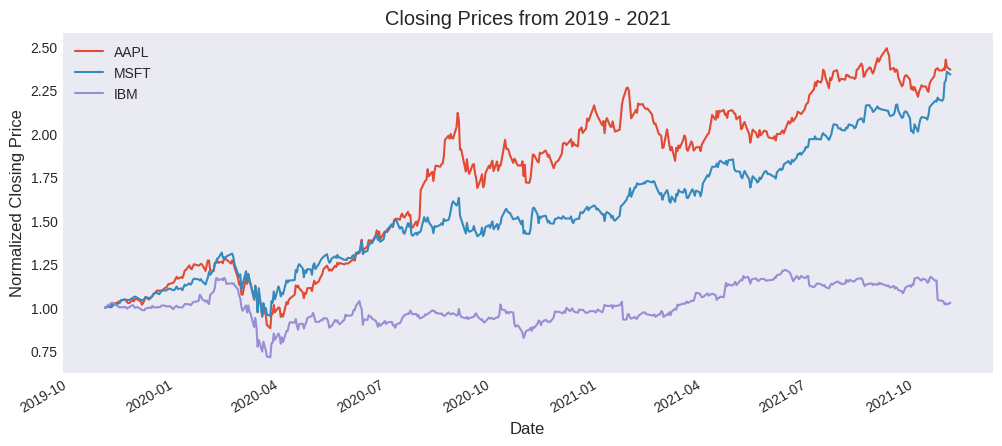

In [ ]:
plt.style.use('seaborn-dark')
plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price')

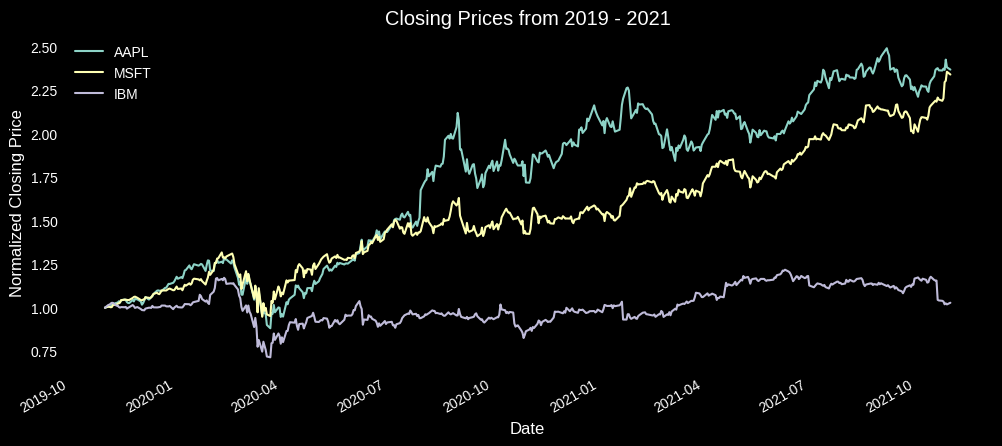

In [ ]:
plt.style.use("dark_background")
plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price')

In [ ]:

# plt.rcParams.update(plt.rcParamsDefault)    #Para  poner los parametros iniciales de plt

###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ##
# plt.rc('font', size=8)                     ##
# plt.rc('axes', titlesize=16)               ##
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ##
#############################################

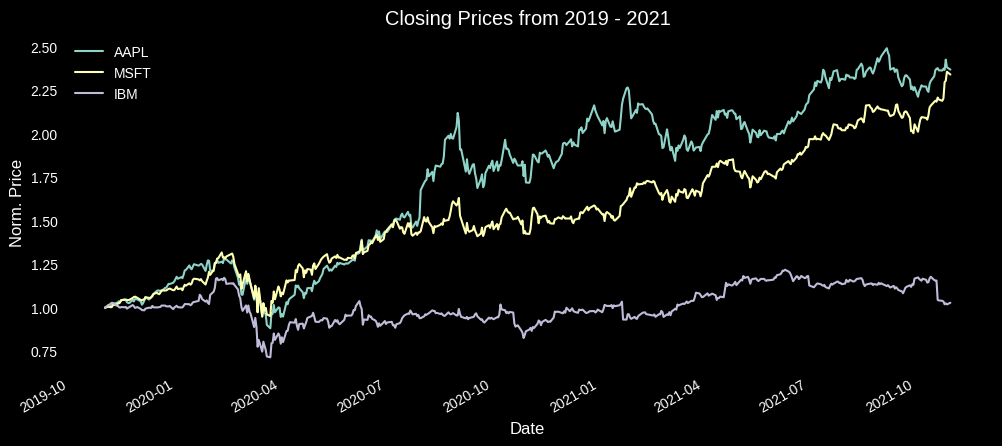

In [ ]:

plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Norm. Price')

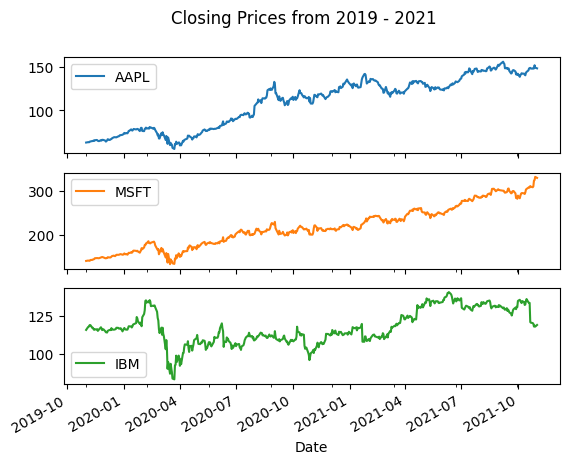

In [ ]:
plt.style.use('default')

plot = closing_price.plot(
            subplots=True,
            sharey=False,
            sharex=True,
            title=f'Closing Prices from {start_date} - {end_date}')
#plt.savefig('images/fig_9.5.png', bbox_inches='tight')

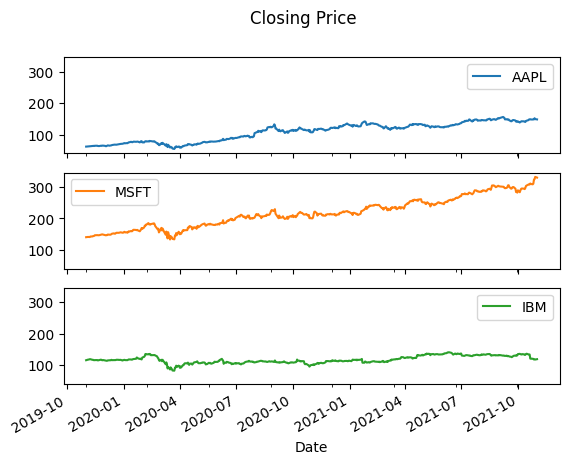

In [ ]:
# with sharey = False notice the difference
plot = closing_price.plot(
            subplots=True,
            sharey=True,
            sharex=True,
            title='Closing Price')

# Recipe 2. Plotting Time Series with Interactive Visualization using hvplot and Plotly Express

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import hvplot.pandas
import hvplot as hv
closing_price_n = closing_price.div(closing_price.iloc[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


In [ ]:
plot = closing_price_n.hvplot(
    title=f'Closing Prices from {start_date} - {end_date}')
plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
closing_price_n.plot(backend='hvplot',
                     title=f'Closing Prices from {start_date} - {end_date}')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
plot = closing_price_n.plot(backend='hvplot',
                     title=f'Closing Prices from {start_date} - {end_date}')
plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
plot = closing_price.hvplot(width=300, subplots=True)
plot

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [ ]:
closing_price.hvplot(width=300, subplots=True).cols(2)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

### There is more

In [ ]:
closing_price['AAPL'].hvplot.line(by=['index.year'])

:NdOverlay   [index.year]
   :Curve   [Date]   (AAPL)

In [ ]:
(closing_price_n['AAPL'].hvplot(width=800, height=500) +
 closing_price_n['MSFT'].hvplot(width=800, height=500))

:Layout
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [ ]:
(closing_price_n['AAPL'].hvplot(width=800, height=500) *
 closing_price_n['MSFT'].hvplot())

:Overlay
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [ ]:
(closing_price['AAPL'].hvplot(width=400) + closing_price['MSFT'].hvplot(width=400)) * closing_price['IBM'].hvplot()

:Layout
   .Overlay.I  :Overlay
      .Curve.AAPL :Curve   [Date]   (AAPL)
      .Curve.IBM  :Curve   [Date]   (IBM)
   .Overlay.II :Overlay
      .Curve.MSFT :Curve   [Date]   (MSFT)
      .Curve.IBM  :Curve   [Date]   (IBM)

In [ ]:
import seaborn as sns

In [ ]:
melted_cp = closing_price_n.copy().reset_index().melt(id_vars=['Date'], value_vars=closing_price_n.columns.tolist())
melted_cp.head()

,Date,variable,value
0,2019-11-01,AAPL,1.000000
1,2019-11-04,AAPL,1.006567
2,2019-11-05,AAPL,1.005121
3,2019-11-06,AAPL,1.005551
4,2019-11-07,AAPL,1.017156


In [ ]:
closing_price.columns.names = ['Symbols']

<Axes: xlabel='Date'>

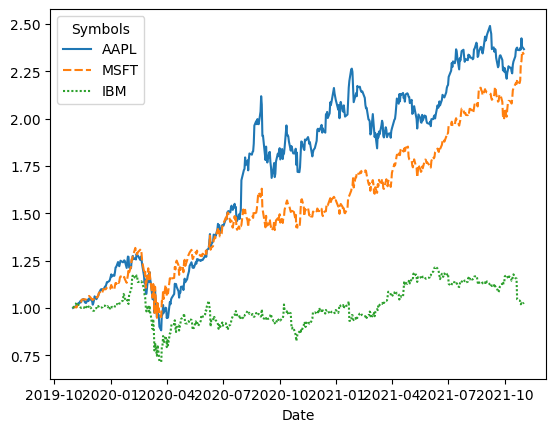

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=closing_price_n)

# Recipe 3. Decomposing Time Series

In [ ]:
import pandas as pd
import statsmodels as sm
from statsmodels.datasets import elec_equip, co2
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

In [ ]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ##
# plt.rc('font', size=8)                     ##
# plt.rc('axes', titlesize=16)               ##
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ##
#############################################

In [ ]:
# write as a CSV dataset for future use
airp_df.reset_index().rename(columns={'value':'passengers', 'index':'date'}).to_csv('/content/drive/MyDrive/Lectura Técnica/Time-Series-Analysis-with-Python-Cookbook/datasets/Ch9/air_passenger.csv', index=False)

### Plot the datasets

In [ ]:
co2_df.shape

(2284, 1)

In [ ]:
co2_df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [ ]:
co2_df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


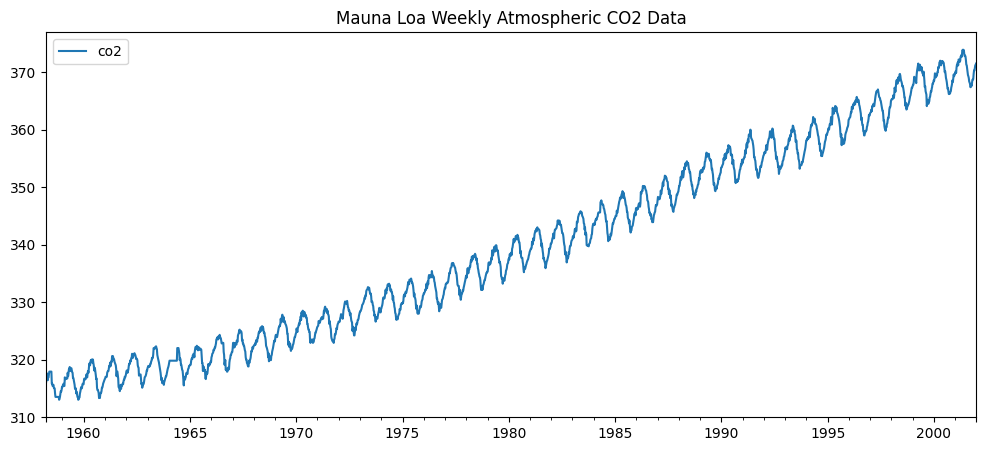

In [ ]:
plpt = co2_df.plot(title=co2.TITLE)
#plt.savefig('images/fig_9.12.png', bbox_inches='tight')

In [ ]:
airp_df.head()

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


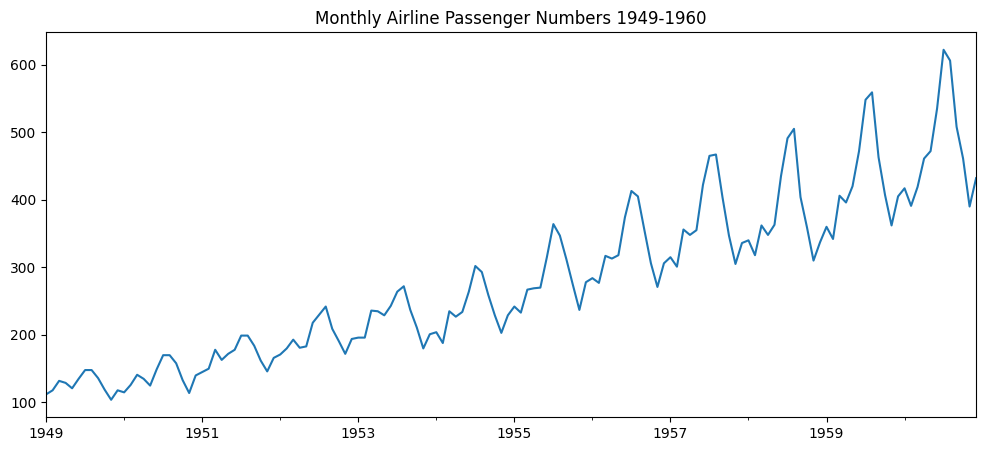

In [ ]:
plot = airp_df['value'].plot(title=air_passengers['title'])
#plt.savefig('images/fig_9.13.png', bbox_inches='tight')

In [ ]:
#plt.rcParams["figure.figsize"] = (11,6)
co2_decomposed = seasonal_decompose(co2_df,model='additive')
air_decomposed = seasonal_decompose(airp_df,model='multiplicative')

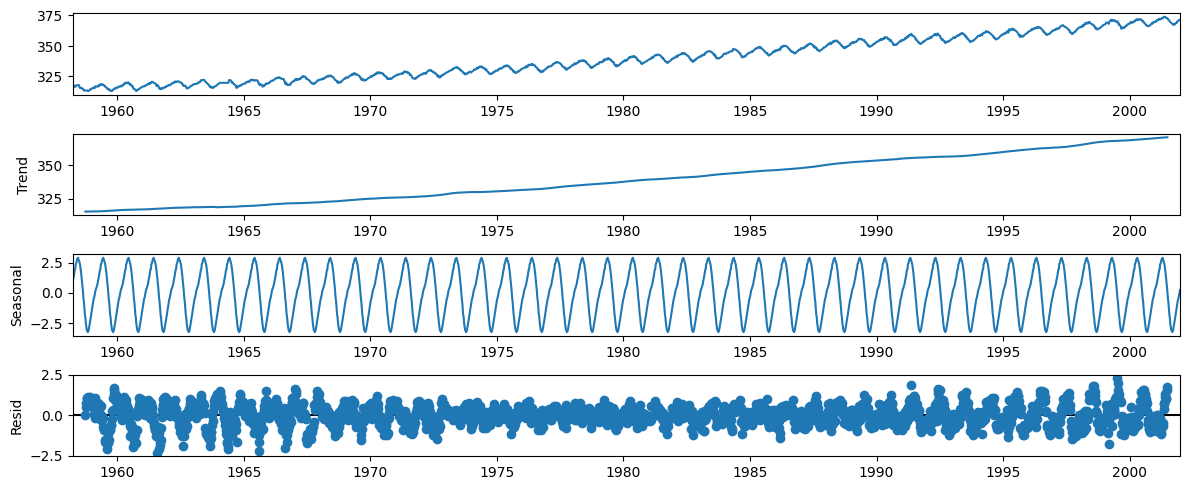

In [ ]:
plot = co2_decomposed.plot()
#plt.savefig('images/fig_9.15.png', bbox_inches='tight')

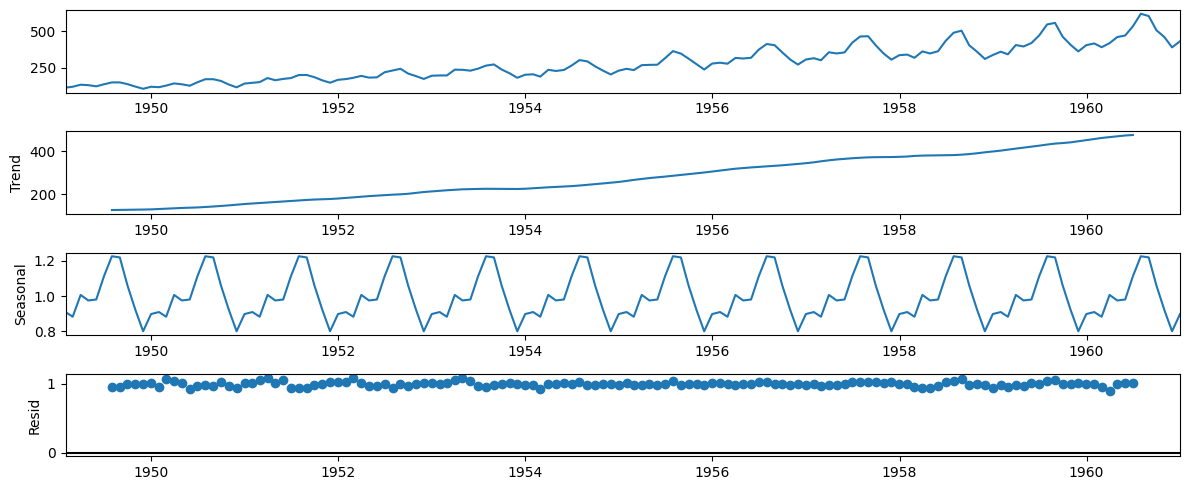

In [ ]:
plot = air_decomposed.plot()
#plt.savefig('images/fig_9.14.png', bbox_inches='tight')

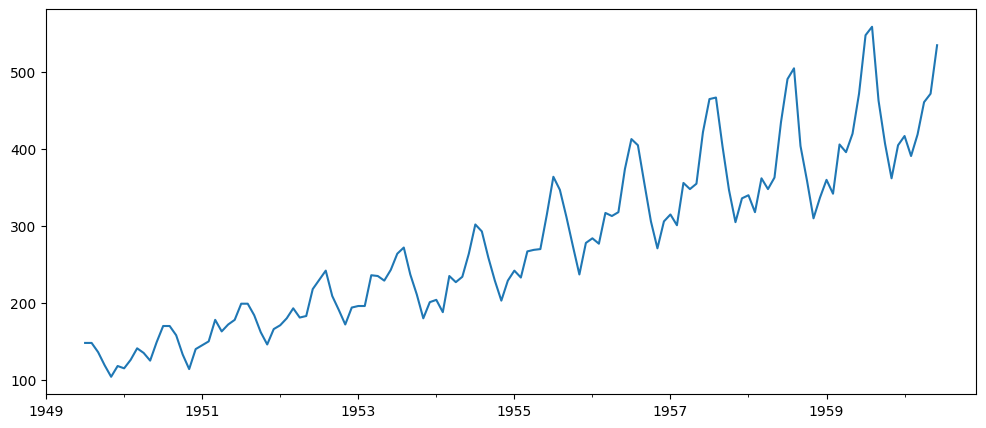

In [ ]:
plot = (air_decomposed.trend *
     air_decomposed.seasonal *
     air_decomposed.resid).plot()
#plt.savefig('images/fig_9.16.png', bbox_inches='tight')

In [ ]:
co2_stl = STL(
    co2_df,
    seasonal=13, # tiene que ser impar y mayor a 7 (la seasonality es de 1 año o 12 meses pero tiene que ser numero impar por ello se pone 13)
    robust=True).fit()

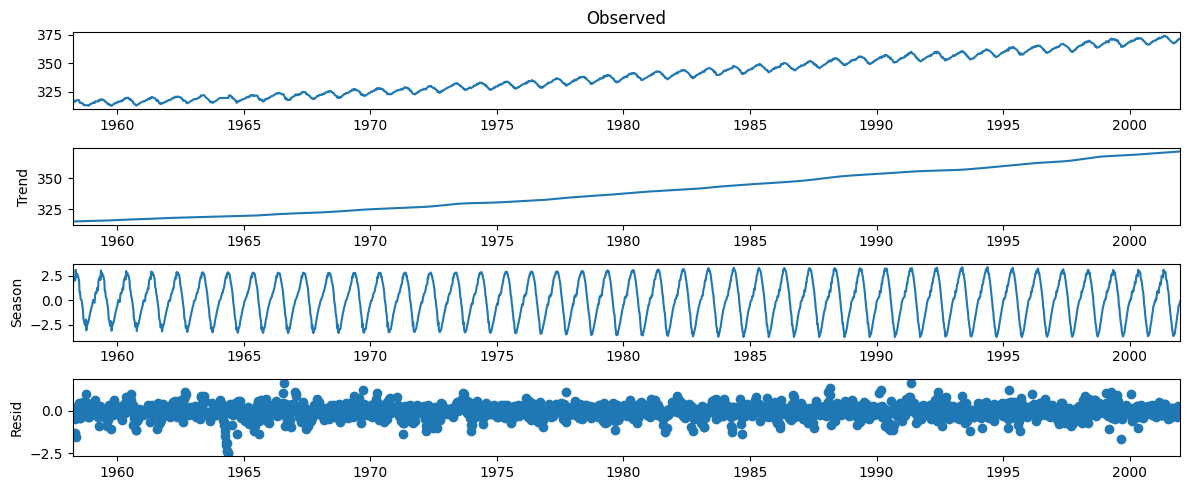

In [ ]:
plot = co2_stl.plot()
#plt.savefig('images/fig_9.17.png', bbox_inches='tight')

### There is more

In [ ]:
# plt.rcParams["figure.figsize"] = (20,3)
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
hpfilter(co2_df)

(1958-03-29   -1.559479
 1958-04-05   -0.285928
 1958-04-12    0.088597
 1958-04-19    0.065250
 1958-04-26   -0.954871
                 ...   
 2001-12-01    0.619135
 2001-12-08    0.969594
 2001-12-15    1.215590
 2001-12-22    1.159358
 2001-12-29    1.202375
 Freq: W-SAT, Name: cycle, Length: 2284, dtype: float64,
 1958-03-29    317.659479
 1958-04-05    317.585928
 1958-04-12    317.511403
 1958-04-19    317.434750
 1958-04-26    317.354871
                  ...    
 2001-12-01    369.680865
 2001-12-08    369.830406
 2001-12-15    369.984410
 2001-12-22    370.140642
 2001-12-29    370.297625
 Freq: W-SAT, Name: trend, Length: 2284, dtype: float64)

In [ ]:
co2_cyclic, co2_trend = hpfilter(co2_df)

<Axes: title={'center': 'CO2 Trend Component'}>

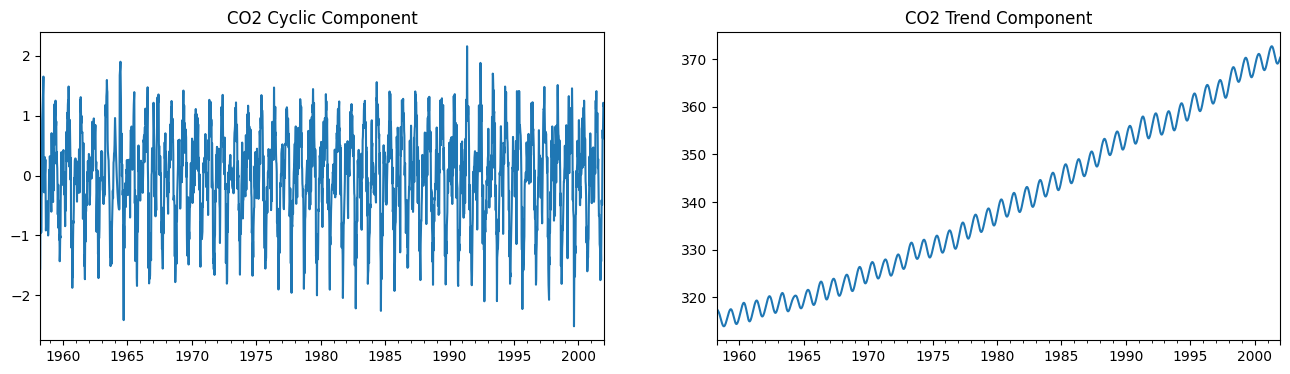

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
co2_cyclic.plot(ax=ax[0], title='CO2 Cyclic Component')
co2_trend.plot(ax=ax[1], title='CO2 Trend Component')
#fig.savefig('images/fig_9.18.png', bbox_inches='tight')

In [ ]:
((co2_cyclic + co2_trend) == co2_df['co2']).sum()

2284

In [ ]:
co2_df.shape

(2284, 1)

# Recipe 4. Detecting Time Series Stationarity

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.datasets import co2

<Axes: >

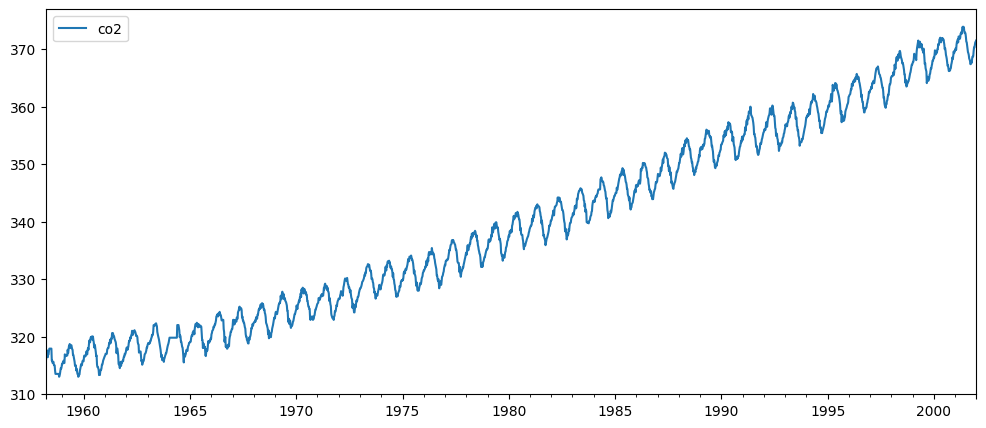

In [ ]:
co2_df.plot()

<Axes: ylabel='Frequency'>

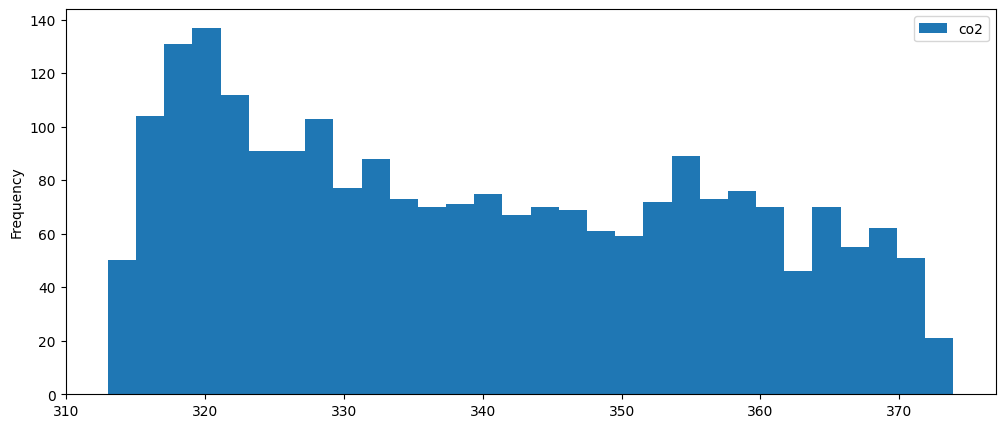

In [ ]:
co2_df.plot(kind='hist',bins=30)

In [ ]:
co2_df.shape

(2284, 1)

In [ ]:
# n = co2_df.shape[0]
# lags = int(12*(n/100)**(0.25))

In [ ]:
# use this instead
def print_results(output, test='adf'):

    pval = output[1]
    test_score = output[0]
    lags = output[2]

    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'

    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [ ]:
adf_output = adfuller(co2_df)
kpss_output = kpss(co2_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,0.046051,7.649196
p-value,0.962179,0.01
Numbers of lags,27,29
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.433252,0.739
Critical Value (5%),-2.862822,0.463
Critical Value (10%),-2.567452,0.347
Critical Value (2.5%),NaN,0.574


In [ ]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)

    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'

    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non Stationary'
    return (kpssh, adfh)

In [ ]:
def plot_comparison(methods, plot_type='line'):
    n = len(methods) // 2
    fig, ax = plt.subplots(n,2, sharex=True, figsize=(20,10))
    for i, method in enumerate(methods):
        method.dropna(inplace=True)
        name = [n for n in globals() if globals()[n] is method]
        v, r = i // 2, i % 2

        kpss_s, adf_s = check_stationarity(method)

        method.plot(kind=plot_type,
                    ax=ax[v,r],
                    legend=False,
                    title=f'{name[0].upper()} KPSS={kpss_s}, ADF={adf_s}')
        ax[v,r].title.set_size(14)
        method.rolling(52).mean().plot(ax=ax[v,r], legend=False)


In [ ]:
# using first order differencing (detrending)
first_ord_diff = co2_df.diff().dropna()

# using second order differencing
second_ord_diff = co2_df.diff().diff().dropna()

# differencing to remove seasonality
diseasonalize = co2_df.diff(52).dropna()

# using rolling mean
rolling_mean = co2_df.rolling(window=52).mean()
subt_roll_mean = co2_df - rolling_mean

# log transform
log_transform = np.log(co2_df)

# Square root transform
square_root = np.sqrt(co2_df)

# using seasonal_decompose to remove trend
decomp = seasonal_decompose(co2_df)
sd_detrend = (decomp.observed - decomp.trend)

# using hp_filter
cyclic_extract, trend = hpfilter(co2_df)

# combine the methods into a list
methods = [first_ord_diff, second_ord_diff,
           diseasonalize, subt_roll_mean,
           log_transform, square_root,
           sd_detrend, cyclic_extract]

In [ ]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
# plt.rc('font', size=8)                     ##
# plt.rc('axes', titlesize=10)               ##
# plt.rc('axes', labelsize=12)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=10)             ##
#############################################

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the 

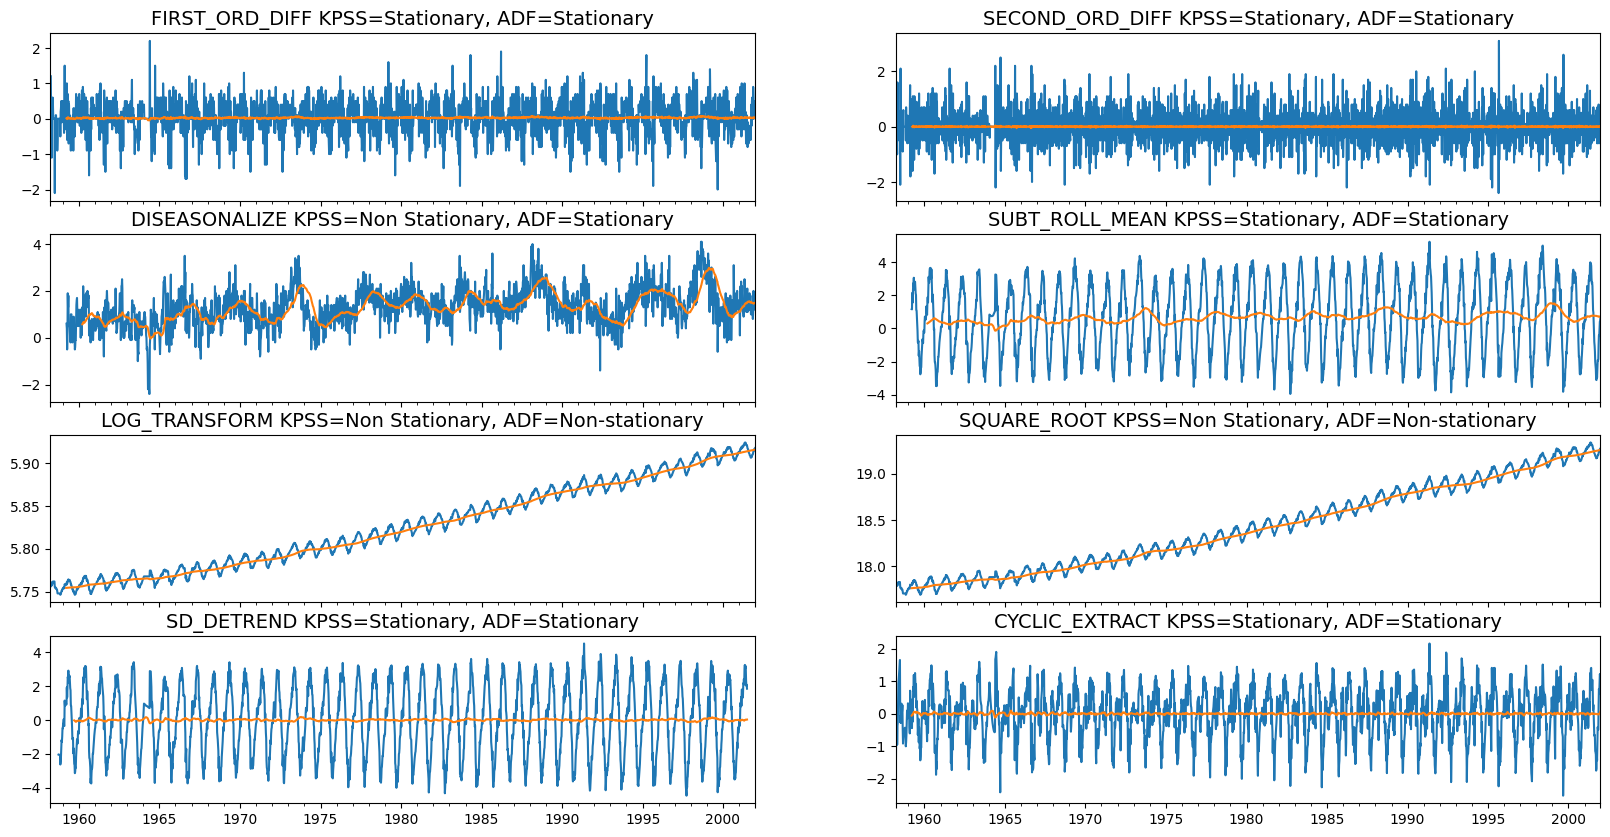

In [ ]:
plot = plot_comparison(methods)
warnings.simplefilter(action='ignore')
#plt.savefig('images/fig_9.20.png', bbox_inches='tight')

### There is more

In [ ]:
adf_result = adfuller(first_ord_diff, store=True)

In [ ]:
adf_result

(-15.517472045988958,
 2.3063609140309003e-28,
 {'1%': -3.4332532193008443,
  '5%': -2.862822565622804,
  '10%': -2.5674527697012306},
 <statsmodels.stats.diagnostic.ResultsStore at 0x7f1cdbbfb8b0>)

In [ ]:
adf_result[3]

In [ ]:
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:15:52   Log-Likelihood:                -1300.1
No. Observations:                2255   AIC:                             2658.
Df Residuals:                    2226   BIC:                             2824.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.2089      0.078    -15.517      0.000      -1.362      -1.056
x2             0.0694      0.074      0.934      0.351      -0.076       0.215
x3             0.0549      0.071      0.771      0.441      -0.085       0.194
x4             0.2661      0.068      3.894      0.000       0.132       0.400
x5             0.4363      0.066      6.603      0.000       0.307       0.566
x6             0.6273      0.064      9.780      0.000       0.502       0.753
x7             0.7159      0.063     11.377      0.000       0.592       0.839
x8             0.8211      0.062     13.246      0.000       0.699       0.943
x9             0.8455      0.061     13.779      0.000       0.725       0.966
x10            0.8269      0.061     13.641      0.000       0.708       0.946
x11            0.7763      0.060     13.011      0.000       0.659       0.893
x12            0.6904      0.058     11.815      0.000       0.576       0.805
x13            0.5949      0.057     10.486      0.000       0.484       0.706
x14            0.4798      0.055      8.736      0.000       0.372       0.588
x15            0.3971      0.053      7.466      0.000       0.293       0.501
x16            0.3136      0.052      6.074      0.000       0.212       0.415
x17            0.2572      0.050      5.096      0.000       0.158       0.356
x18            0.2521      0.050      5.082      0.000       0.155       0.349
x19            0.2443      0.049      4.982      0.000       0.148       0.341
x20            0.2534      0.049      5.211      0.000       0.158       0.349
x21            0.2867      0.048      5.940      0.000       0.192       0.381
x22            0.3286      0.048      6.864      0.000       0.235       0.422
x23            0.3501      0.047      7.426      0.000       0.258       0.443
x24            0.3452      0.046      7.504      0.000       0.255       0.435
x25            0.3440      0.044      7.904      0.000       0.259       0.429
x26            0.2724      0.039      6.924      0.000       0.195       0.350
x27            0.1844      0.032      5.846      0.000       0.123       0.246
x28            0.0940      0.021      4.493      0.000       0.053       0.135
const          0.0299      0.009      3.201      0.001       0.012       0.048
==============================================================================
Omnibus:                       57.058   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.961
Skew:                           0.023   Prob(JB):                     2.21e-29
Kurtosis:                       4.184   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [ ]:
adf_result = adfuller(co2_df ,store=True)
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     24.42
Date:                Wed, 28 Jun 2023   Prob (F-statistic):          1.63e-108
Time:                        23:15:52   Log-Likelihood:                -1310.4
No. Observations:                2256   AIC:                             2679.
Df Residuals:                    2227   BIC:                             2845.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.512e-05      0.001      0.046      0.963      -0.001       0.001
x2            -0.1320      0.021     -6.248      0.000      -0.173      -0.091
x3            -0.0062      0.021     -0.294      0.769      -0.048       0.035
x4             0.2200      0.021     10.403      0.000       0.178       0.261
x5             0.1717      0.022      7.932      0.000       0.129       0.214
x6             0.1930      0.022      8.799      0.000       0.150       0.236
x7             0.0872      0.022      3.911      0.000       0.044       0.131
x8             0.1022      0.022      4.569      0.000       0.058       0.146
x9             0.0212      0.022      0.944      0.345      -0.023       0.065
x10           -0.0200      0.022     -0.891      0.373      -0.064       0.024
x11           -0.0504      0.022     -2.244      0.025      -0.094      -0.006
x12           -0.0858      0.022     -3.816      0.000      -0.130      -0.042
x13           -0.0909      0.023     -4.034      0.000      -0.135      -0.047
x14           -0.1077      0.023     -4.774      0.000      -0.152      -0.063
x15           -0.0753      0.022     -3.350      0.001      -0.119      -0.031
x16           -0.0725      0.022     -3.238      0.001      -0.116      -0.029
x17           -0.0481      0.022     -2.149      0.032      -0.092      -0.004
x18            0.0024      0.022      0.109      0.913      -0.041       0.046
x19           -0.0042      0.022     -0.187      0.852      -0.048       0.040
x20            0.0103      0.022      0.461      0.645      -0.033       0.054
x21            0.0307      0.022      1.378      0.168      -0.013       0.074
x22            0.0327      0.022      1.474      0.140      -0.011       0.076
x23            0.0134      0.022      0.604      0.546      -0.030       0.057
x24           -0.0227      0.022     -1.042      0.298      -0.065       0.020
x25           -0.0169      0.021     -0.789      0.430      -0.059       0.025
x26           -0.0914      0.021     -4.354      0.000      -0.133      -0.050
x27           -0.0875      0.021     -4.154      0.000      -0.129      -0.046
x28           -0.0781      0.021     -3.726      0.000      -0.119      -0.037
const          0.0187      0.185      0.101      0.919      -0.345       0.382
==============================================================================
Omnibus:                       56.964   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.100
Skew:                           0.046   Prob(JB):                     5.61e-29
Kurtosis:                       4.173   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

# Recipe 5. Applying Power Transformations to Time Series Data (318 pg)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
from statsmodels.stats.api import (het_breuschpagan,
                                   het_goldfeldquandt,
                                   het_white, jarque_bera,
                                   omni_normtest, normal_ad)
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant

In [ ]:
# plt.rcParams["figure.figsize"] = (20,8)

### Testing for Normality

In [ ]:
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad

In [ ]:
def is_normal(test, p_level=0.05):
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

<Axes: >

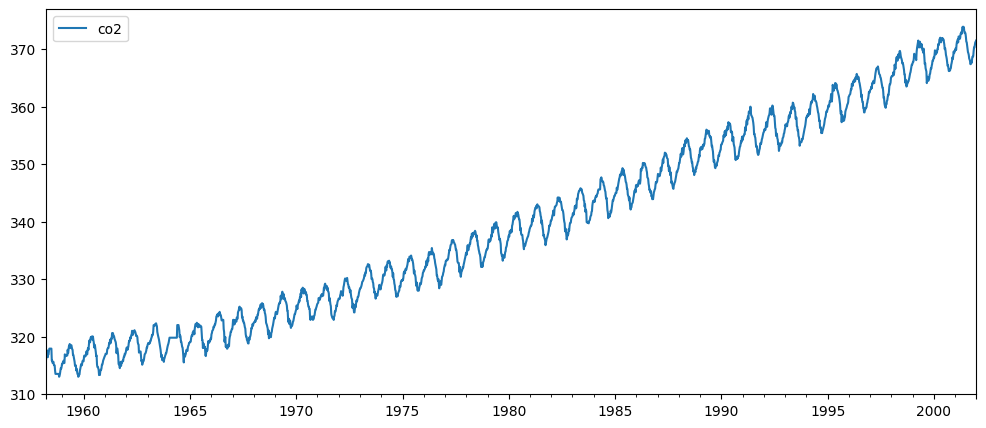

In [ ]:
co2_df.plot()

In [ ]:
normal_args = (np.mean(co2_df),np.std(co2_df))

print(is_normal(shapiro(co2_df)))
print(is_normal(normaltest(co2_df)))
print(is_normal(normal_ad(co2_df)))
print(is_normal(kstest_normal(co2_df)))
# print(is_normal(kstest(co2_df,
#                    cdf='norm',
#                    args=normal_args)))

Not Normal
Not Normal
Not Normal
Not Normal


array([[<Axes: title={'center': 'co2'}>]], dtype=object)

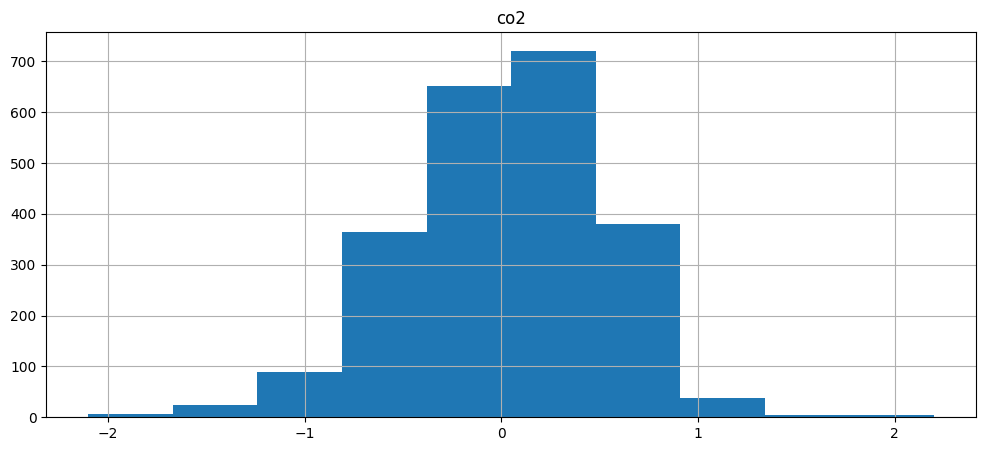

In [ ]:
co2_df.diff().hist()

In [ ]:
# from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(co2_df.dropna(), lags=1, trend='n').fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    co2   No. Observations:                 2284
Model:                     AutoReg(1)   Log Likelihood               -1637.977
Method:               Conditional MLE   S.D. of innovations              0.496
Date:                Wed, 28 Jun 2023   AIC                           3279.954
Time:                        23:15:53   BIC                           3291.420
Sample:                    04-05-1958   HQIC                          3284.136
                         - 12-29-2001                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
co2.L1         1.0001   3.05e-05   3.28e+04      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9999           +0.0000j            0.9999            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
print(is_normal(shapiro(model.resid)))
print(is_normal(normaltest(model.resid)))
print(is_normal(normal_ad(model.resid)))
print(is_normal(kstest_normal(model.resid)))
print(is_normal(kstest(model.resid,
                   cdf='norm',
                   args=(np.mean(model.resid), np.std(model.resid)))))

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


(array([  6.,  25.,  89., 365., 651., 721., 380.,  37.,   5.,   4.]),
 array([-2.12259531, -1.69260882, -1.26262232, -0.83263583, -0.40264933,
         0.02733717,  0.45732366,  0.88731016,  1.31729665,  1.74728315,
         2.17726964]),
 <BarContainer object of 10 artists>)

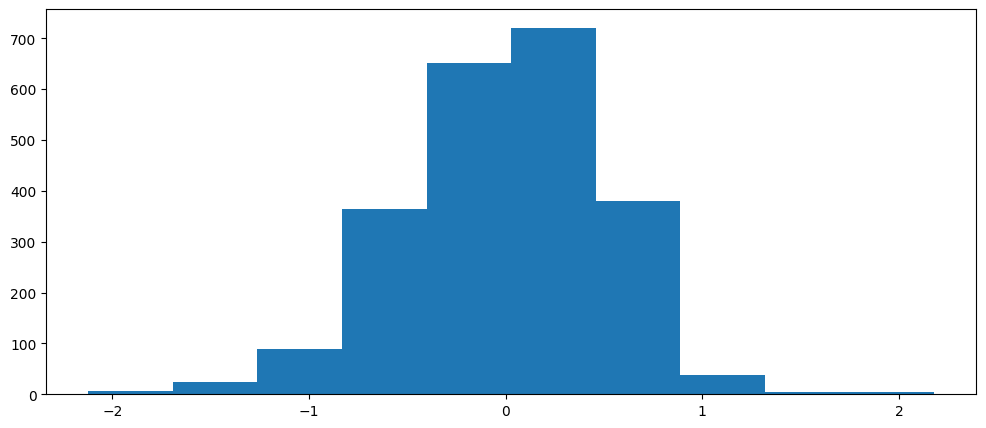

In [ ]:
plt.hist(model.resid)

In [ ]:
model.resid.mean()

0.00012627220485604432

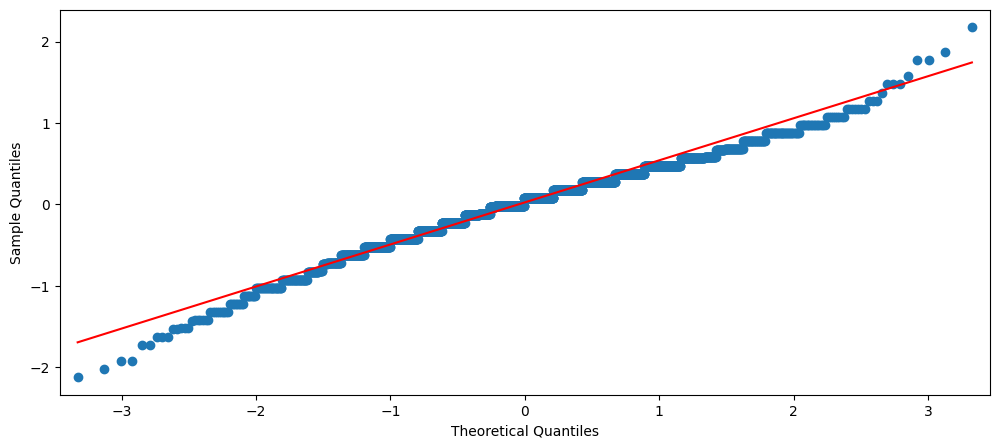

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='q');

## ACF - PACF
### Interpretación para AR - MA - ARMA
https://spureconomics.com/interpreting-acf-and-pacf-plots/

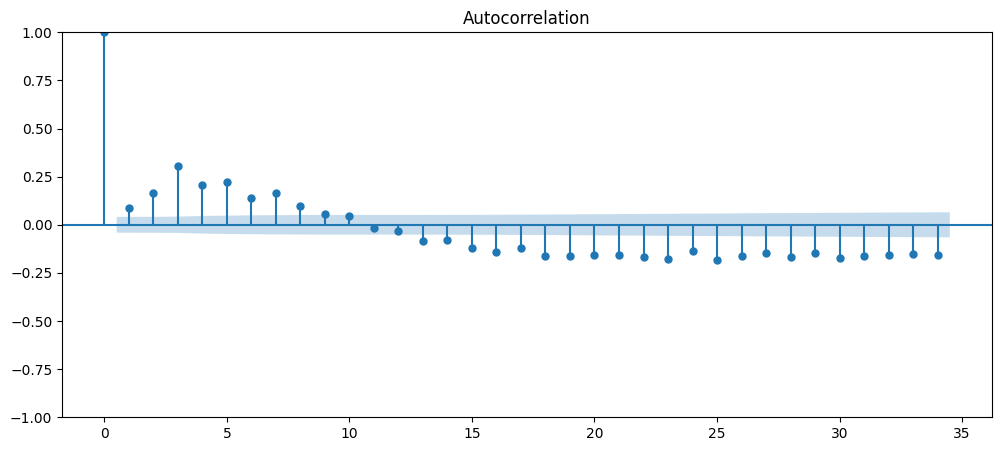

In [ ]:
plot_acf(model.resid);plt.show()

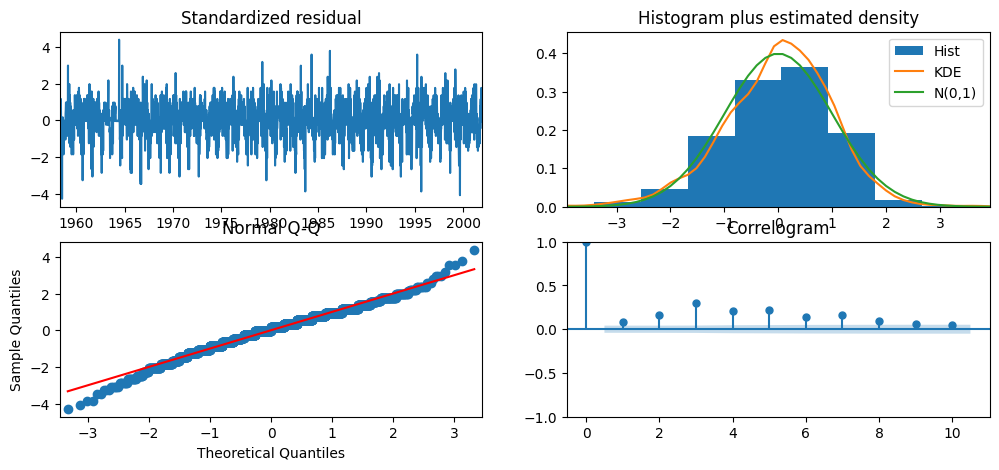

In [ ]:
model.plot_diagnostics();plt.show()

In [ ]:
model.test_normality()

Jarque-Bera    1.194972e+02
P-value        1.125935e-26
Skewness      -3.395637e-01
Kurtosis       3.891627e+00
dtype: float64

In [ ]:
model.test_heteroskedasticity()

,ARCH-LM,P-value,DF
Lag,,,
1,0.590650,0.442168,1
2,2.754957,0.252214,2
3,27.651645,0.000004,3
4,26.480304,0.000025,4
5,30.254785,0.000013,5
6,30.505528,0.000031,6
7,30.480297,0.000078,7
8,30.775329,0.000154,8
9,30.865914,0.000312,9


### Testing Homoskedactiticy

In [ ]:
from statsmodels.stats.api import (het_breuschpagan,
                                   het_white)

In [ ]:
model.resid

1958-04-05    1.177533
1958-04-12    0.277447
1958-04-19   -0.122574
1958-04-26   -1.122567
1958-05-03    0.477511
                ...   
2001-12-01   -0.026320
2001-12-08    0.473680
2001-12-15    0.373645
2001-12-22    0.073616
2001-12-29    0.173609
Freq: W-SAT, Length: 2283, dtype: float64

In [ ]:
model.fittedvalues.shape
model.resid.shape

(2283,)

In [ ]:
model.fittedvalues

1958-04-05    316.122467
1958-04-12    317.322553
1958-04-19    317.622574
1958-04-26    317.522567
1958-05-03    316.422489
                 ...    
2001-12-01    370.326320
2001-12-08    370.326320
2001-12-15    370.826355
2001-12-22    371.226384
2001-12-29    371.326391
Freq: W-SAT, Length: 2283, dtype: float64

In [ ]:
def het_test(model, test=het_breuschpagan):
    lm, lm_pvalue, fvalue, f_pvalue = (
        het_breuschpagan(model.resid,
                         add_constant(
                             model.fittedvalues)
                        ))

    return "Heteroskedastic" if f_pvalue < 0.05 else "Homoskedastic"

In [ ]:
het_test(model, test=het_breuschpagan)

'Homoskedastic'

In [ ]:
het_test(model, test=het_white)

'Homoskedastic'

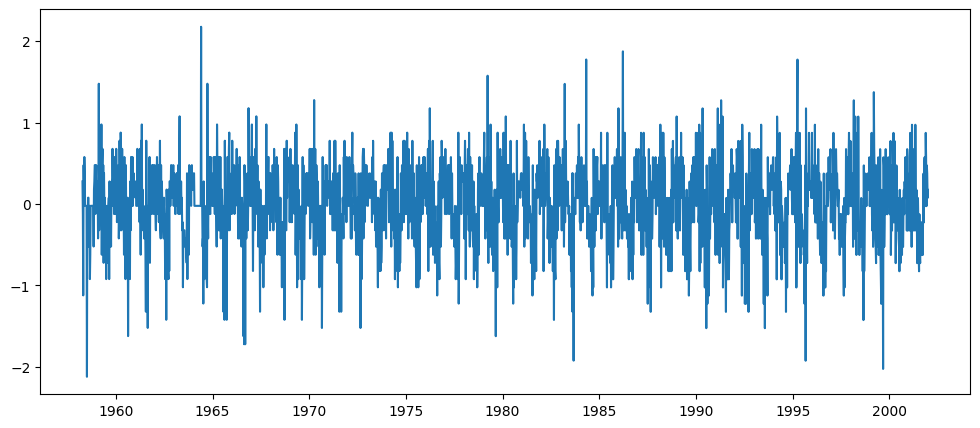

In [ ]:
plt.plot(model.resid[1:])

### Box-Cox Transformation

In [ ]:
from scipy.stats import boxcox

In [ ]:
airp_df

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [ ]:
xt, lmbda = boxcox(airp_df['value'])

In [ ]:
xts = pd.Series(xt, index=airp_df.index)

Text(0.5, 1.0, 'Box-Cox Transformed')

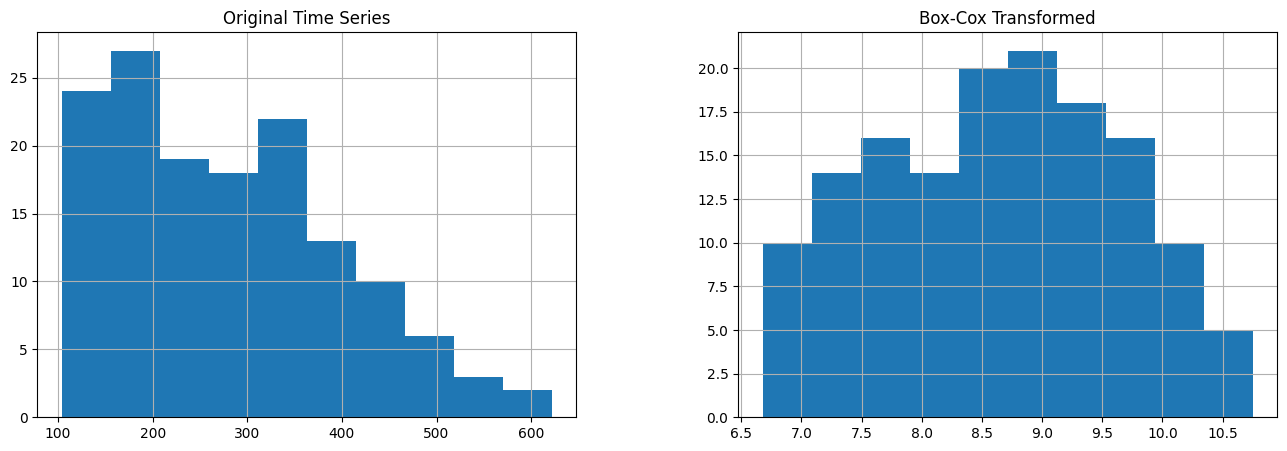

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
airp_df.hist(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.hist(ax=ax[1])
ax[1].set_title('Box-Cox Transformed')
# plt.savefig('images/fig_9.23.png', bbox_inches='tight')

Text(0.5, 1.0, 'Box-Cox Transformed')

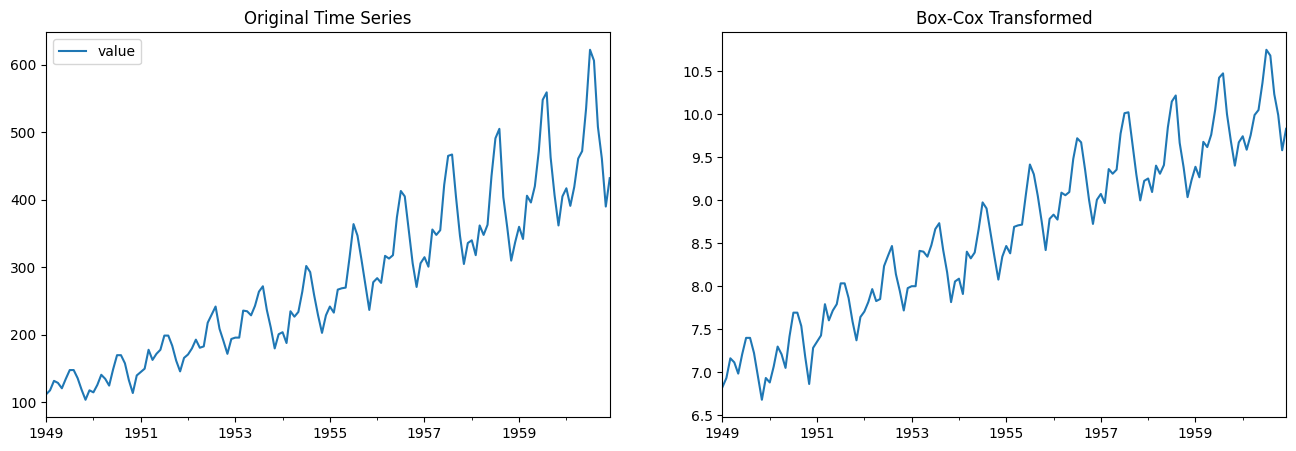

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
airp_df.plot(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.plot(ax=ax[1])
ax[1].set_title('Box-Cox Transformed')
#plt.savefig('images/fig_9.24.png', bbox_inches='tight')

In [ ]:
model_airp = AutoReg(airp_df, lags=1, trend='n').fit()
model_bx = AutoReg(xts, lags=1, trend='n').fit()

Text(0.5, 1.0, 'Residual Plot - Box-Cox Transformed')

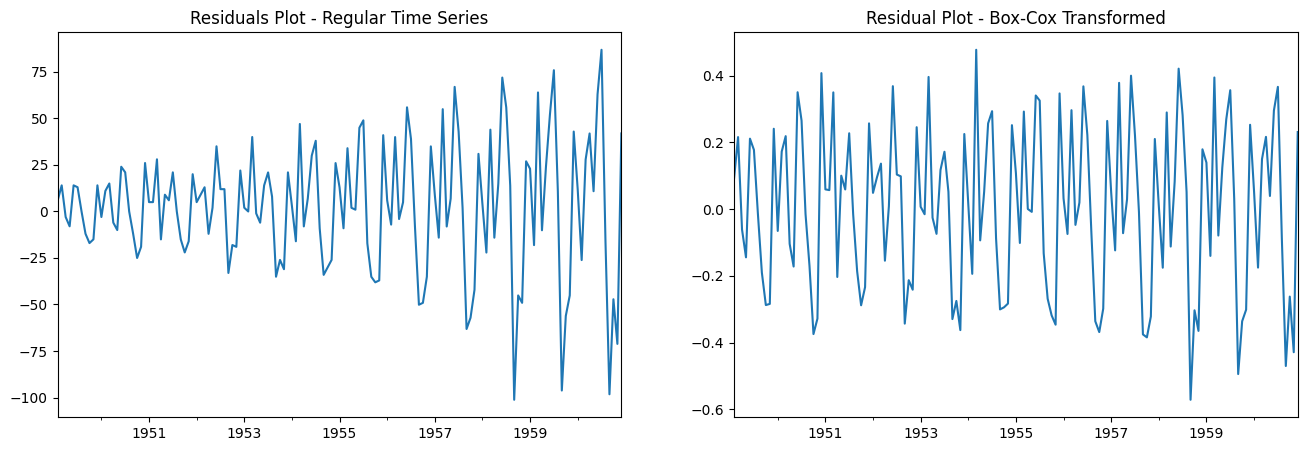

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
model_airp.resid.plot(ax=ax[0])
ax[0].set_title('Residuals Plot - Regular Time Series')
model_bx.resid.plot(ax=ax[1])
ax[1].set_title('Residual Plot - Box-Cox Transformed')
#plt.savefig('images/fig_9.25.png', bbox_inches='tight')

### There is more

In [ ]:
print(model_bx.diagnostic_summary())

       Test of No Serial Correlation       
       Lag  Ljung-Box LB P-value         DF
-------------------------------------------
         1      8.800      0.003          1
         2     12.729      0.002          2
         3     28.040      0.000          3
         4     29.202      0.000          4
         5     29.205      0.000          5
         6     31.021      0.000          6
         7     47.992      0.000          7
         8     50.468      0.000          8
         9     52.247      0.000          9


             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
      5.987      0.050     -0.128      2.031


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1      0.116      0.733          1
         2      1.243      0.537          2
         3      4.112      0.250          3
         4      4.058   

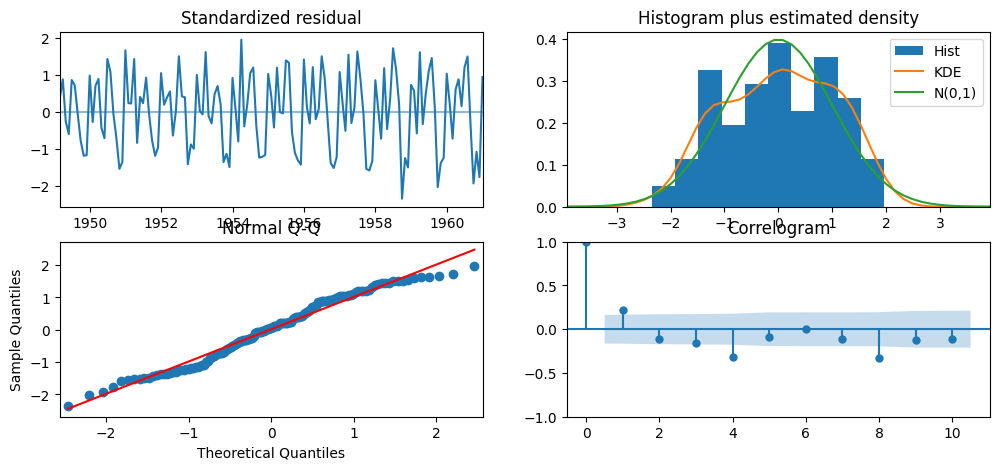

In [ ]:
plot = model_bx.plot_diagnostics()
#plt.savefig('images/fig_9.27.png', bbox_inches='tight')


# Recipe 6. Testing for Autocorrelation

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
co2_diff = co2_df.diff().dropna()
# co2_diff = np.log(co2_diff).diff().dropna()

In [ ]:
acorr_ljungbox(co2_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,16.465996,4.953050e-05
2,79.094659,6.680563e-18
3,290.951900,9.035108e-63
4,390.520507,3.107289e-83
5,502.638658,2.151267e-106
6,546.194148,9.337537e-115
7,608.250032,4.072029e-127
8,630.709764,5.827742e-131
9,637.510409,1.851867e-131
10,641.806647,1.923859e-131


### There is more

In [ ]:
acorr_ljungbox(model_bx.resid, return_df=True, lags=10)

,lb_stat,lb_pvalue
1,6.891379,8.661245e-03
2,8.799865,1.227817e-02
3,12.728606,5.261829e-03
4,28.039695,1.224399e-05
5,29.201881,2.116595e-05
6,29.204901,5.563811e-05
7,31.021143,6.161812e-05
8,47.991784,9.915323e-08
9,50.468158,8.794752e-08
10,52.247452,1.026842e-07
